In [1]:
import numpy as np
from scipy.sparse import linalg as splinalg
import matplotlib.pyplot as plt
import parafields

from condiff import fd_mtx2

# Generation examples

## Poisson example

In [2]:
grid = 128
A = fd_mtx2(np.ones([grid+1, grid+1], dtype='float64'))
b = np.random.normal(0, 1, grid*grid)
x = splinalg.spsolve(A, b)

norm(Ax - b) / norm(b): 1.1987894234446325e-14


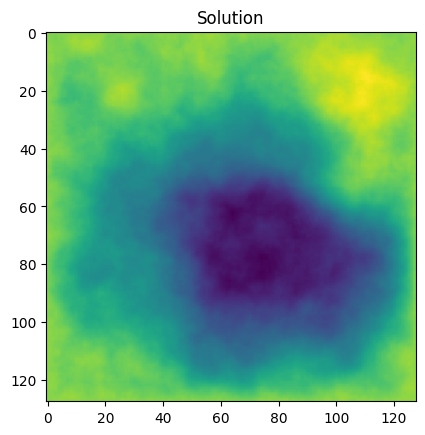

In [3]:
print('norm(Ax - b) / norm(b):', np.linalg.norm(A @ x - b) / np.linalg.norm(b))
plt.imshow(x.reshape([grid, grid]))
plt.title('Solution');

## Diffusion example

In [4]:
grid = 128
field = parafields.generate_field(cells=[grid+1, grid+1], covariance='exponential', variance=1.0, seed=42)
k = np.exp(field.evaluate())
A = fd_mtx2(np.ones([grid+1, grid+1], dtype='float64'))
b = np.random.normal(0, 1, grid*grid)
x = splinalg.spsolve(A, b)

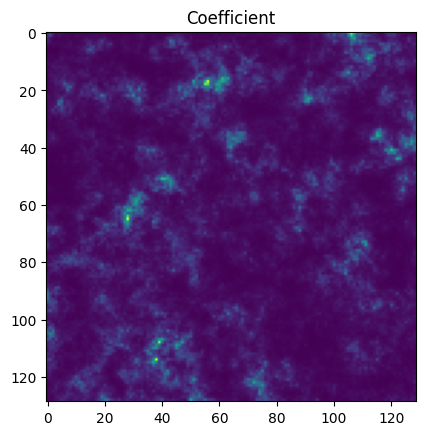

In [5]:
plt.imshow(k)
plt.title('Coefficient');

norm(Ax - b) / norm(b): 4.869651766140985e-15


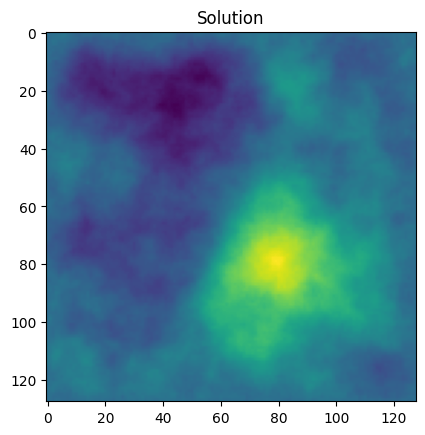

In [6]:
print('norm(Ax - b) / norm(b):', np.linalg.norm(A @ x - b) / np.linalg.norm(b))
plt.imshow(x.reshape([grid, grid]))
plt.title('Solution');

# Loading examples

In [7]:
from load_ConDiff import load_ConDiff

save_dir = 
pde = 'diffusion'
covariance = 'gaussian'
variance = 1.0
grid = 128
train, test = load_ConDiff(save_dir, pde, grid, covariance, variance)

/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Generating train split: 1 examples [00:00, 91.79 examples/s]
Generating test split: 1 examples [00:00, 219.68 examples/s]


In [8]:
train[0].shape, train[1].shape, train[2].shape

((1000, 129, 129), (1000, 16384), (1000, 16384))

In [9]:
test[0].shape, test[1].shape, test[2].shape

((200, 129, 129), (200, 16384), (200, 16384))

In [10]:
type(train[0])

numpy.ndarray